In [28]:
%pylab inline
import numpy as np
import numpy.random as rand
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import random as rng
import seaborn as sns
import pickle
import argparse
import pandas as pd 
import pickle
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
#Find the best models from the hyperparameter search
%cd /home/lansdell/projects/synthfeedback/

/home/lansdell/projects/synthfeedback


## Load models

In [16]:
#Load BP data from script
#model = 'bpself'
#fn_in = './experiments/nodepert_ae5_%s/summary/3_autoencoder.npz'%model
#fn_in = './experiments/nodepert_ae5_bp_convparams/summary/3_autoencoder_correctbatch.npz'
#with open(fn_in, 'rb') as f:
#    data = pickle.load(f)
#tags = data['tags']
#metrics = data['metrics']
#loss_BP = metrics[0,:,:,0]

#Load FA data
#model = 'faself'
#fn_in = './experiments/nodepert_ae5_%s/summary/3_autoencoder.npz'%model
#fn_in = './experiments/nodepert_ae5_fa_convparams/summary/3_autoencoder_correctbatch.npz'
#with open(fn_in, 'rb') as f:
#    data = pickle.load(f)
#tags = data['tags']
#metrics = data['metrics']
#loss_FA = metrics[0,:,:,0]

#Load NP data
#fn_in = './experiments/nodepert_ae5_sgd/summary/3_autoencoder_correctbatch_hyperparam.npz'
#with open(fn_in, 'rb') as f:
#    data = pickle.load(f)
#tags = data['tags']
#metrics = data['metrics']
#loss_NP = metrics[:,0,:,0].T
#params = data['params']
#test_losses = data['test_losses']
#print('Minimum for AE NP: ', np.min(test_losses))

#Load ADAM data
#fn_in = './experiments/nodepert_ae5_adam/summary/3_autoencoder_correctbatch_hyperparam.npz'
#with open(fn_in, 'rb') as f:
#    data = pickle.load(f)
#tags = data['tags']
#metrics = data['metrics']
#loss_ADAM = metrics[:,0,:,0].T
#params = data['params']
#test_losses = data['test_losses']
#print('Minimum for AE ADAM: ', np.min(test_losses))

In [13]:
method = 'faauto'
fn_in = './experiments/nodepert_ae5_%s/summary/3_autoencoder_correctbatch_hyperparam.npz'%method
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
tags = data['tags']
metrics = data['metrics']
loss_NP = metrics[:,0,:,0].T
params = data['params']
test_losses = data['test_losses']
print('Minimum for AE FA: ', np.min(test_losses))
minidx = np.argmin(test_losses)
print(params[minidx][1])

Minimum for AE FA:  702.7919311523438
3.4722373454283575e-06


In [14]:
method = 'adam'
fn_in = './experiments/nodepert_ae5_%s/summary/3_autoencoder_correctbatch_hyperparam.npz'%method
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
tags = data['tags']
metrics = data['metrics']
loss_NP = metrics[:,0,:,0].T
params = data['params']
test_losses = data['test_losses']
print('Minimum for AE ADAM: ', np.min(test_losses))
minidx = np.argmin(test_losses)
print(params[minidx][1])

Minimum for AE ADAM:  452.3138427734375
0.0001411275857690097


In [15]:
method = 'bpauto'
fn_in = './experiments/nodepert_ae5_%s/summary/3_autoencoder_correctbatch_hyperparam.npz'%method
with open(fn_in, 'rb') as f:
    data = pickle.load(f, encoding = 'latin1')
tags = data['tags']
metrics = data['metrics']
loss_NP = metrics[:,0,:,0].T
params = data['params']
test_losses = data['test_losses']
print('Minimum for AE BP: ', np.min(test_losses))
minidx = np.argmin(test_losses)

print(params[minidx][1])

Minimum for AE BP:  521.1770629882812
0.0003727823218891601


In [45]:
method = 'matched_convparams'
fn_in = './experiments/nodepert_ae5_%s/summary/3_autoencoder_correctbatch_hyperparam.npz'%method
with open(fn_in, 'rb') as f:
    data = pickle.load(f, encoding = 'latin1')
tags = data['tags']
metrics = data['metrics']
loss_NP = metrics[:,0,:,0].T
params = data['params']
test_losses = data['test_losses']
print('Minimum for AE BP: ', np.min(test_losses[0:17], axis = 1))
minidx = np.argmin(test_losses)
print(loss_NP[-1,:])
print(test_losses)
#Index 8 has the smallest loss...
print('Best learning rate:', params[8][1])

Minimum for AE BP:  [598.77429199 781.56616211 750.87463379 749.77685547 608.30773926
 863.48474121 939.04772949 579.44287109 550.06640625 636.5189209
 561.09191895 773.91137695 732.37890625 674.87841797 687.86828613
 700.50842285 609.13409424]
[634.72650146 712.8223877  853.21697998 779.02661133 635.7588501
 771.53411865 888.61853027 641.59777832 645.84124756 691.07086182
 636.4574585  719.34869385 741.34863281 657.78887939 710.35687256
 702.50323486 659.36895752   0.           0.           0.        ]
[[598.77429199]
 [781.56616211]
 [750.87463379]
 [749.77685547]
 [608.30773926]
 [863.48474121]
 [939.04772949]
 [579.44287109]
 [550.06640625]
 [636.5189209 ]
 [561.09191895]
 [773.91137695]
 [732.37890625]
 [674.87841797]
 [687.86828613]
 [700.50842285]
 [609.13409424]
 [  0.        ]
 [  0.        ]
 [  0.        ]]
Best learning rate: 0.00019942367232893114


## Plot of losses

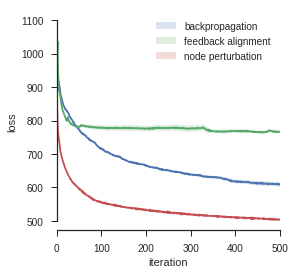

In [57]:
fig,axes = plt.subplots(1,1,figsize=(4,4))

sns.tsplot(loss_BP, ax = axes, color='C0')
sns.tsplot(loss_FA, ax = axes, color='C1')
sns.tsplot(np.squeeze(loss_NP), ax = axes, color='C2')

axes.legend(['backpropagation', 'feedback alignment', 'node perturbation'])
#axes.set_yscale('log')
axes.set_xlabel('iteration');
#axes.set_ylim([450, 1200])
axes.set_ylabel('loss')
sns.despine(trim=True)
plt.savefig('./figures/3_autoencoder_losses.pdf')